In [101]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# import csv file
df = pd.read_csv('Ecommerce - UK Retailer.csv',encoding= 'unicode_escape')

In [103]:
df.shape

(541909, 8)

In [104]:
# view dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Problem Statements:
### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [105]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [106]:
df['CustomerID'].fillna(df['CustomerID'].mode()[0],inplace=True)

In [107]:
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [108]:
df.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

### 3. Remove duplicate rows

In [109]:
df=df.drop_duplicates()

In [110]:
df.shape

(536641, 8)

### 4. Remove rows which have negative values in Quantity column

In [111]:
df[df['Quantity']< 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [112]:
df[df['Quantity']< 0].index.values

array([   141,    154,    235, ..., 541715, 541716, 541717], dtype=int64)

In [113]:
df=df.drop(df[df['Quantity']< 0].index.values)

In [114]:
df.shape

(526054, 8)

### 5. Add the columns - Month, Day and Hour for the invoice

In [116]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [117]:
# changing the invoice date formate to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

In [118]:
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [119]:
df['Month'] =  df['InvoiceDate'].dt.month_name(locale = 'English')

In [120]:
df['Day'] = df['InvoiceDate'].dt.day_name()

In [121]:
df['Hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour

In [122]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8


### 6. How many orders made by the customers?

In [123]:
df.groupby(by=['year'], as_index=False)['InvoiceNo'].count().head()

,year,InvoiceNo
0,2010,41192
1,2011,484862


### 7. TOP 5 customers with higher number of orders

In [124]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count();

In [125]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4026,17841.0,United Kingdom,139592
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677


### 8. How much money spent by the customers?

In [126]:
df['Total_amount'] = df['Quantity']*df['UnitPrice']

In [127]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,Hour,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [128]:
df['Total_amount'].sum()

10619986.684

### 9. TOP 5 customers with highest money spent

In [129]:
df['Total_amount'] = df['Total_amount'] .astype(int)

In [130]:
Z = pd.DataFrame(df.groupby(['CustomerID'])['Total_amount'].sum())
Z

,Total_amount
CustomerID,
12346.0,77183
12347.0,4251
12348.0,1786
12349.0,1718
12350.0,329
...,...
18280.0,175
18281.0,78
18282.0,171


In [131]:
Z.sort_values(by='Total_amount', ascending=False).head()

,Total_amount
CustomerID,
17841.0,1700046
14646.0,279510
18102.0,259500
17450.0,194246
16446.0,168471


### 10. How many orders per month?

In [132]:
M = pd.DataFrame(df.groupby(['Month'])['InvoiceNo'].count())
M

,InvoiceNo
Month,
April,28957
August,34347
December,66049
February,26961
January,34104
July,38466
June,35793
March,35609
May,36044


### 11. How many orders per day?

In [133]:
D = pd.DataFrame(df.groupby(['Day'])['InvoiceNo'].count())
D

,InvoiceNo
Day,
Friday,79869
Monday,92638
Sunday,62344
Thursday,100427
Tuesday,99066
Wednesday,91710


### 12. How many orders per hour?

In [134]:
H = pd.DataFrame(df.groupby(['Hour'])['InvoiceNo'].count().sort_values())
H


,InvoiceNo
Hour,
6,1
7,379
20,778
19,3428
18,7696
8,8802
17,27498
9,33738
10,47670


### 13. How many orders for each country?

In [135]:
C = pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].count())
print(C)

                      InvoiceNo
Country                        
Australia                  1184
Austria                     398
Bahrain                      18
Belgium                    2031
Brazil                       32
Canada                      151
Channel Islands             747
Cyprus                      603
Czech Republic               25
Denmark                     380
EIRE                       7883
European Community           60
Finland                     685
France                     8393
Germany                    9027
Greece                      145
Hong Kong                   280
Iceland                     182
Israel                      292
Italy                       758
Japan                       321
Lebanon                      45
Lithuania                    35
Malta                       112
Netherlands                2363
Norway                     1072
Poland                      330
Portugal                   1492
RSA                          58
Saudi Ar

### 14. Orders trend across months

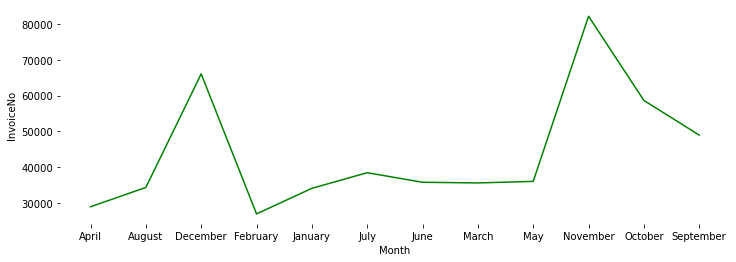

In [136]:
plt.figure(figsize = (12,4))
sns.lineplot(data = M.reset_index(),x = 'Month', y = 'InvoiceNo',color = 'Green')
sns.despine(left = True, bottom = True)


In [137]:
O = pd.DataFrame(df.groupby(['Month'])['InvoiceNo'].count())
O

,InvoiceNo
Month,
April,28957
August,34347
December,66049
February,26961
January,34104
July,38466
June,35793
March,35609
May,36044


### 15. How much money spent by each country?

In [138]:
MS = pd.DataFrame(df.groupby(['Country'])['Total_amount'].count())
print(MS)

                      Total_amount
Country                           
Australia                     1184
Austria                        398
Bahrain                         18
Belgium                       2031
Brazil                          32
Canada                         151
Channel Islands                747
Cyprus                         603
Czech Republic                  25
Denmark                        380
EIRE                          7883
European Community              60
Finland                        685
France                        8393
Germany                       9027
Greece                         145
Hong Kong                      280
Iceland                        182
Israel                         292
Italy                          758
Japan                          321
Lebanon                         45
Lithuania                       35
Malta                          112
Netherlands                   2363
Norway                        1072
Poland              

## 1. Perform Basic EDA
### a. Boxplot – All Numeric Variables

In [139]:
df.describe()

,Quantity,UnitPrice,CustomerID,year,Hour,Total_amount
count,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000
mean,10.730874,3.871747,15934.828884,2010.921696,13.074633,19.690233
std,157.591838,42.016560,1850.841481,0.268649,2.442553,272.256100
min,1.000000,-11062.060000,12346.000000,2010.000000,6.000000,-11062.000000
25%,1.000000,1.250000,14382.000000,2011.000000,11.000000,3.000000
50%,4.000000,2.080000,16279.000000,2011.000000,13.000000,9.000000
75%,11.000000,4.130000,17841.000000,2011.000000,15.000000,17.000000
max,80995.000000,13541.330000,18287.000000,2011.000000,20.000000,168469.000000


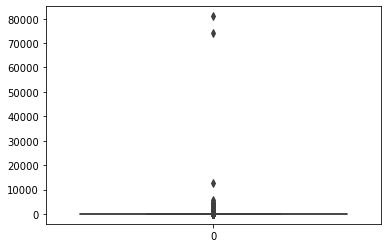

In [140]:
sns.boxplot(data=df['Quantity']);

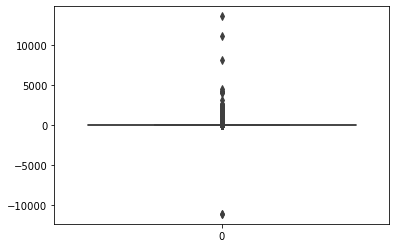

In [141]:
sns.boxplot(data=df['UnitPrice']);

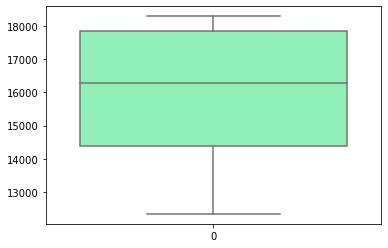

In [142]:
sns.boxplot(data=df['CustomerID'],palette='rainbow');

### b. Histogram – All Numeric Variables

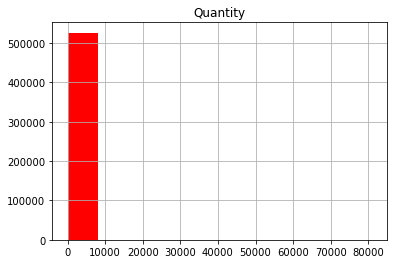

In [143]:
df.hist(column='Quantity',color = 'red');

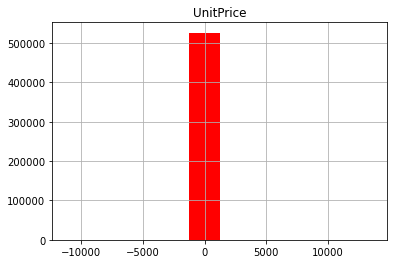

In [232]:
df.hist(column='UnitPrice',color = 'red');

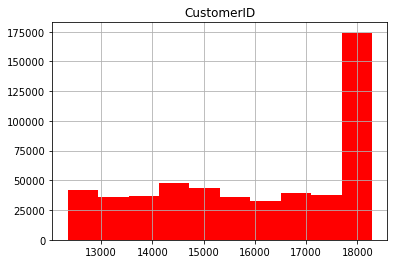

In [233]:
df.hist(column='CustomerID',color = 'red');

### c. Distribution Plot – All Numeric Variables

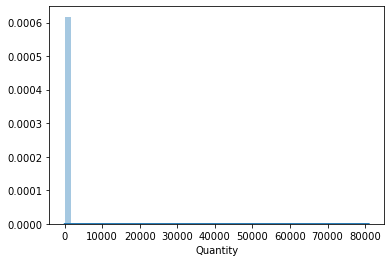

In [146]:
sns.distplot(df['Quantity']);

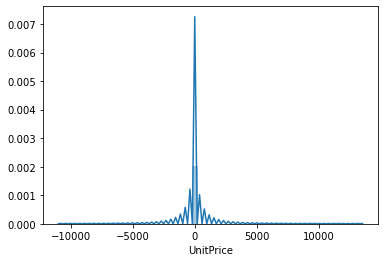

In [147]:
sns.distplot(df['UnitPrice']);

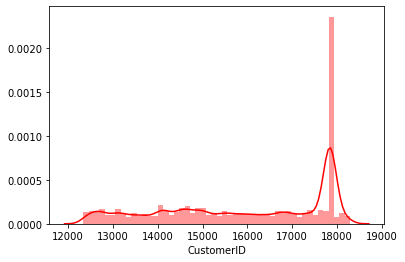

In [154]:
sns.distplot(df['CustomerID'] , color = 'Red');

### d. Aggregation for all numerical Columns


In [156]:
df.describe()

,Quantity,UnitPrice,CustomerID,year,Hour,Total_amount
count,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000
mean,10.730874,3.871747,15934.828884,2010.921696,13.074633,19.690233
std,157.591838,42.016560,1850.841481,0.268649,2.442553,272.256100
min,1.000000,-11062.060000,12346.000000,2010.000000,6.000000,-11062.000000
25%,1.000000,1.250000,14382.000000,2011.000000,11.000000,3.000000
50%,4.000000,2.080000,16279.000000,2011.000000,13.000000,9.000000
75%,11.000000,4.130000,17841.000000,2011.000000,15.000000,17.000000
max,80995.000000,13541.330000,18287.000000,2011.000000,20.000000,168469.000000


### e. Unique Values across all columns


In [198]:
UniqueValues = df.nunique()
print('count of uniquevalues in each column')
print(UniqueValues)

count of uniquevalues in each column
InvoiceNo       20728
StockCode        3941
Description      4077
Quantity          393
InvoiceDate     19052
UnitPrice        1293
CustomerID       4339
Country            38
year                2
Month              12
Day                 6
Hour               15
Total_amount     1027
dtype: int64


In [200]:
df['InvoiceNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
579015       1
563025       1
552135       1
553729       1
567800       1
Name: InvoiceNo, Length: 20728, dtype: int64

In [201]:
df['StockCode'].value_counts()

85123A    2258
85099B    2112
22423     2009
47566     1700
20725     1582
          ... 
35951        1
21839        1
84206B       1
84856S       1
84550        1
Name: StockCode, Length: 3941, dtype: int64

In [202]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2907
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
LILAC FEATHERS CURTAIN                   1
SET OF 3 PINK FLYING DUCKS               1
SMALL TAHITI BEACH BAG                   1
WEEKEND BAG VINTAGE ROSE PAISLEY         1
HEN HOUSE W CHICK IN NEST                1
Name: Description, Length: 4077, dtype: int64

In [204]:
df['Quantity'].value_counts()

1       144495
2        81245
12       60858
6        40656
4        38393
         ...  
196          1
4800         1
193          1
701          1
512          1
Name: Quantity, Length: 393, dtype: int64

In [205]:
df['InvoiceDate'].value_counts()

2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-03-29 10:26:00       1
2011-02-16 12:13:00       1
2011-12-02 09:22:00       1
2011-08-18 17:04:00       1
2010-12-12 14:49:00       1
Name: InvoiceDate, Length: 19052, dtype: int64

In [206]:
df['UnitPrice'].value_counts()

1.25       49011
1.65       36944
0.85       27748
2.95       26692
0.42       24046
           ...  
283.00         1
836.14         1
208.34         1
2196.67        1
192.54         1
Name: UnitPrice, Length: 1293, dtype: int64

In [208]:
df['CustomerID'].value_counts()

17841.0    140998
14911.0      5672
14096.0      5111
12748.0      4413
14606.0      2677
            ...  
15524.0         1
15562.0         1
15657.0         1
15668.0         1
12346.0         1
Name: CustomerID, Length: 4339, dtype: int64

In [207]:
df['Country'].value_counts()

United Kingdom          481143
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [209]:
df['year'].value_counts()

2011    484862
2010     41192
Name: year, dtype: int64

In [210]:
df['Month'].value_counts()

November     82133
December     66049
October      58629
September    48962
July         38466
May          36044
June         35793
March        35609
August       34347
January      34104
April        28957
February     26961
Name: Month, dtype: int64

In [211]:
df['Day'].value_counts()

Thursday     100427
Tuesday       99066
Monday        92638
Wednesday     91710
Friday        79869
Sunday        62344
Name: Day, dtype: int64

In [212]:
df['Hour'].value_counts()

12    76096
15    75851
13    70067
14    65384
11    55592
16    53074
10    47670
9     33738
17    27498
8      8802
18     7696
19     3428
20      778
7       379
6         1
Name: Hour, dtype: int64

In [213]:
df['Total_amount'].value_counts()

2       41088
1       39380
4       38227
15      32630
3       31219
        ...  
858         1
2395        1
648         1
346         1
1242        1
Name: Total_amount, Length: 1027, dtype: int64

### f. Duplicate values across all columns


In [162]:
duplicate = df[df.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,Month,Day,Hour,Total_amount


### g. Correlation – Heatmap - All Numeric Variables


In [172]:
C = df.corr()

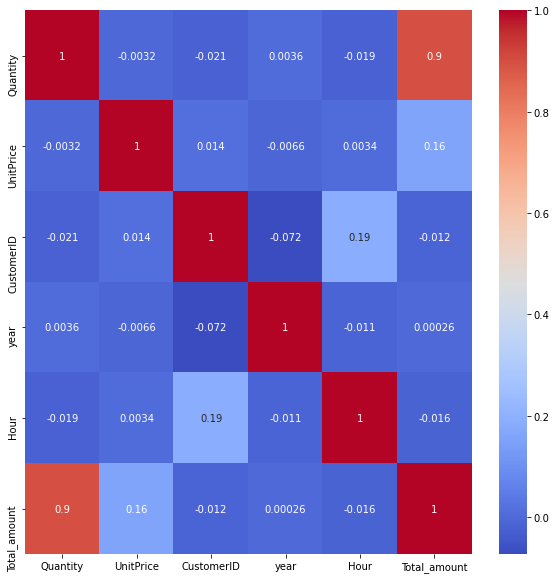

In [174]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(C, cmap = 'coolwarm', annot = True, ax=ax);

### h. Regression Plot - All Numeric Variables


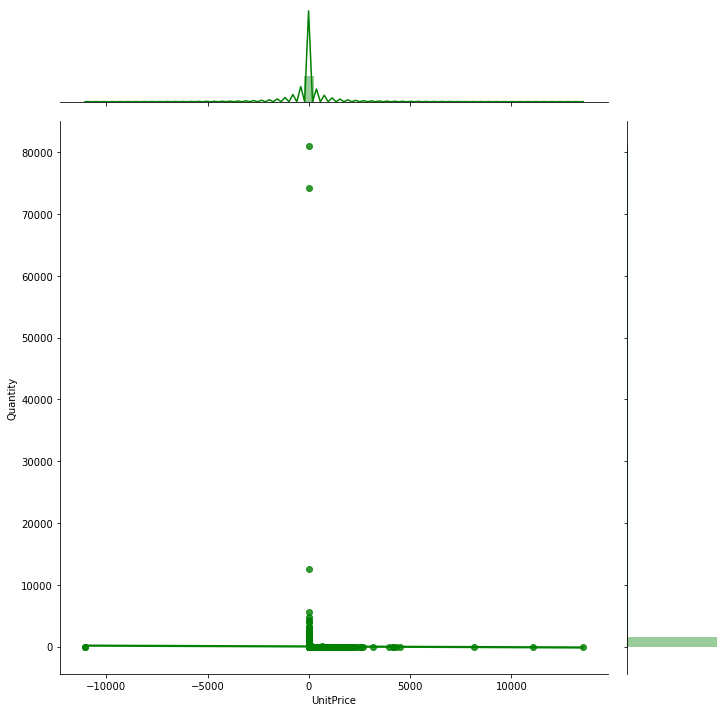

In [216]:
sns.jointplot(x='UnitPrice',y='Quantity',data=df,kind='reg',color = 'green',size = 10);

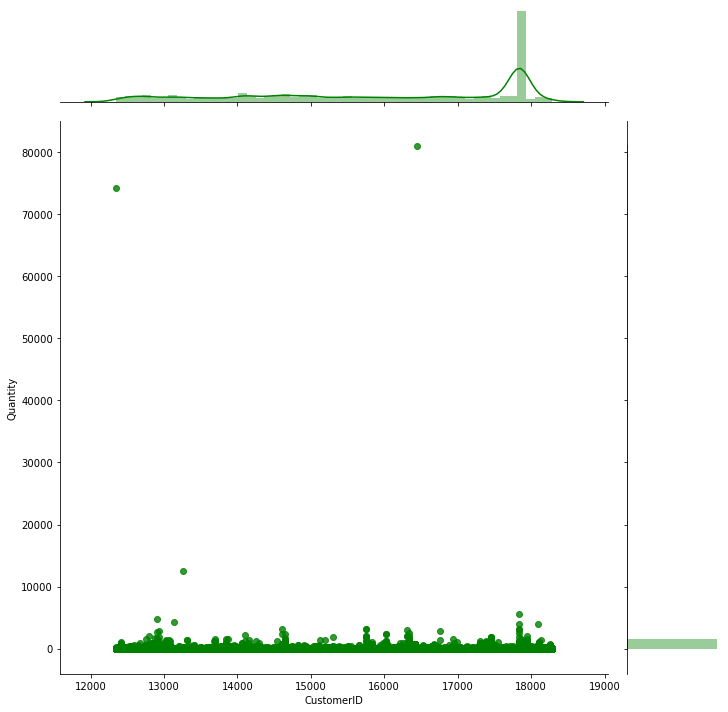

In [234]:
sns.jointplot(x='CustomerID',y='Quantity',data=df,kind='reg',color = 'green',size = 10);

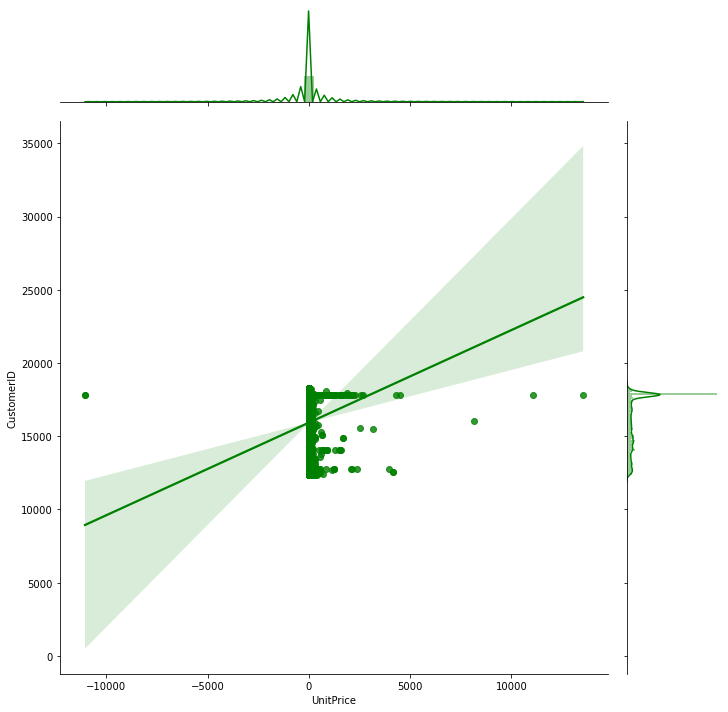

In [235]:
sns.jointplot(x='UnitPrice',y='CustomerID',data=df,kind='reg',color = 'green',size = 10);

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable


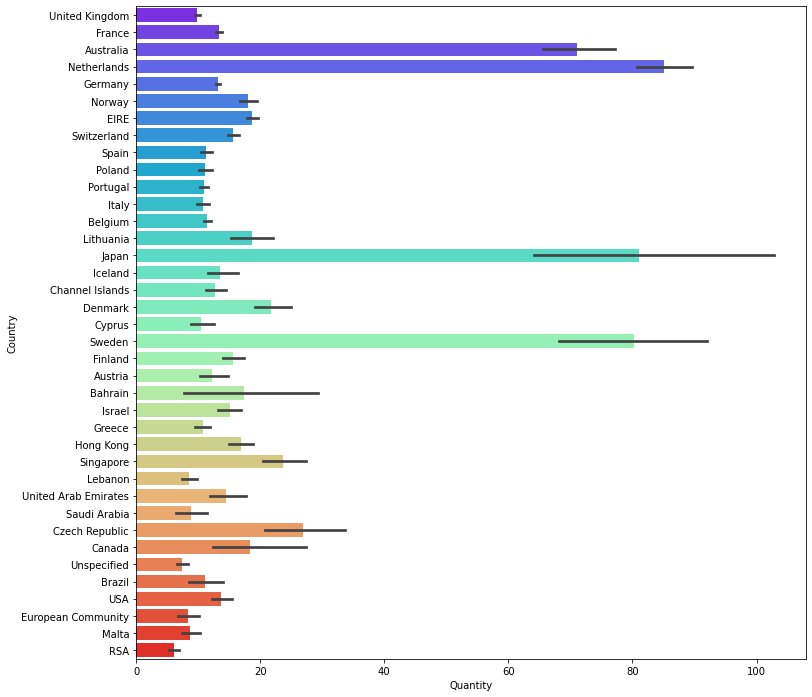

In [230]:
plt.figure(figsize = (12,12))
sns.barplot(x='Quantity',y='Country',data=df,palette = 'rainbow');

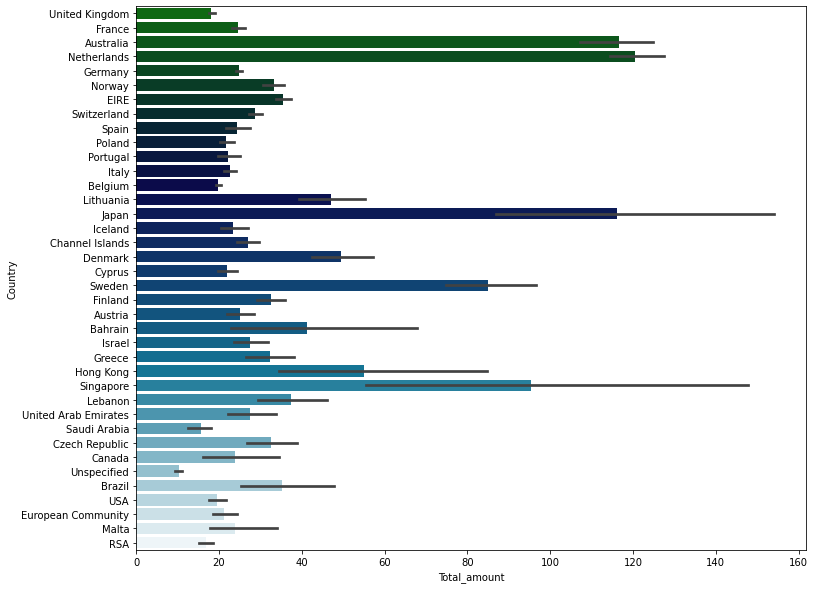

In [231]:
plt.figure(figsize = (12,10))
sns.barplot(x='Total_amount',y='Country',data=df,palette = 'ocean');

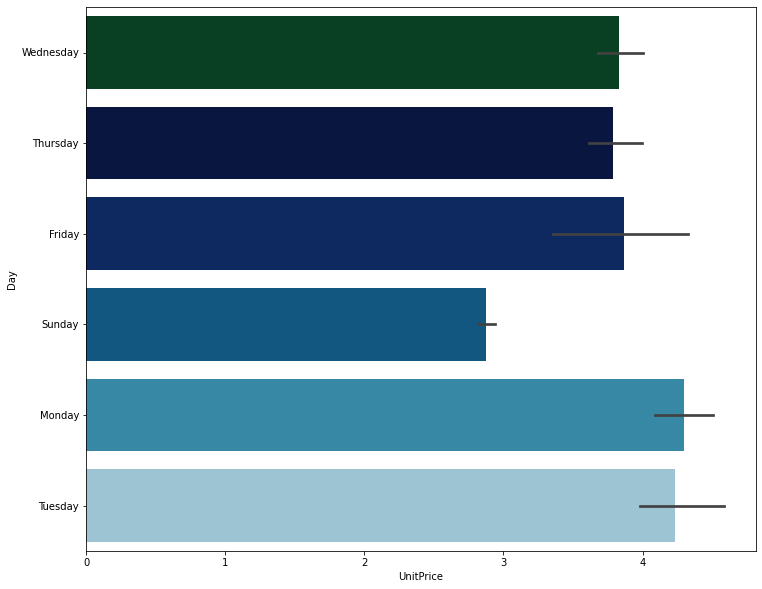

In [228]:
plt.figure(figsize = (12,10))
sns.barplot(x='UnitPrice',y='Day',data=df,palette = 'ocean');

### j. Pair plot - All Numeric Variables


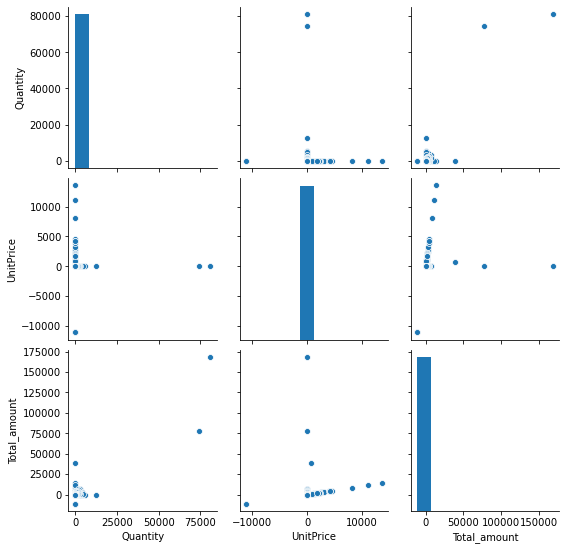

In [195]:
sns.pairplot(df, vars = ['Quantity','UnitPrice','Total_amount']);

### k. Line chart to show the trend of data - All Numeric/Date Variables


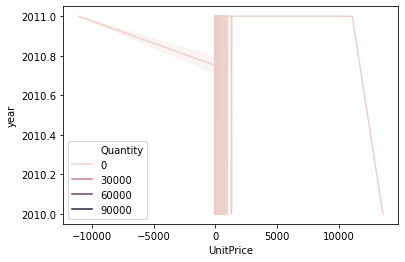

In [197]:
sns.lineplot(x = 'UnitPrice',y = 'year',data = df,hue = 'Quantity')
plt.show()

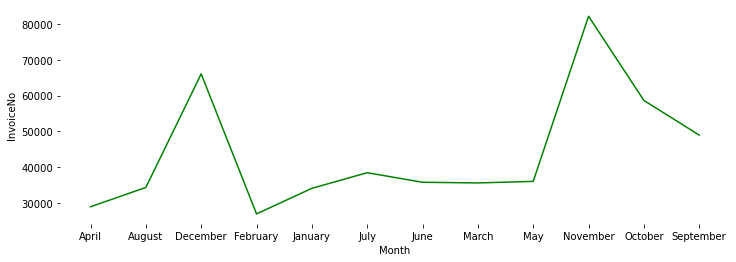

In [222]:
plt.figure(figsize = (12,4))
sns.lineplot(data = M.reset_index(),x = 'Month', y = 'InvoiceNo',color = 'Green')
sns.despine(left = True, bottom = True)

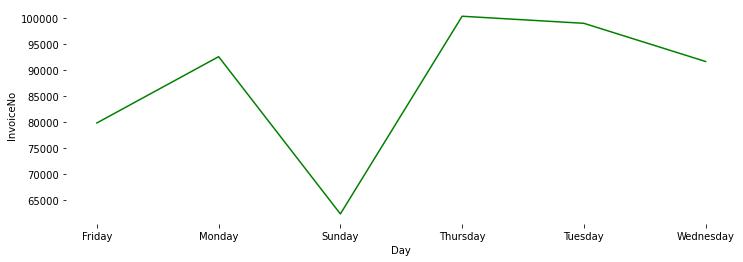

In [224]:
plt.figure(figsize = (12,4))
sns.lineplot(data = D.reset_index(),x = 'Day', y = 'InvoiceNo',color = 'Green')
sns.despine(left = True, bottom = True)

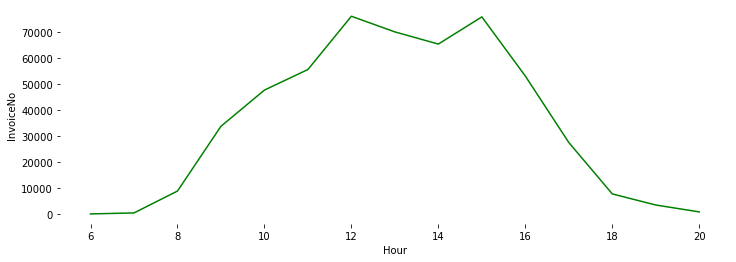

In [225]:
plt.figure(figsize = (12,4))
sns.lineplot(data = H.reset_index(),x = 'Hour', y = 'InvoiceNo',color = 'Green')
sns.despine(left = True, bottom = True)

### l. Plot the skewness - All Numeric Variables

In [196]:
df.skew(axis = 0,skipna = True)

Quantity        457.999413
UnitPrice        60.256683
CustomerID       -0.408359
year             -3.139394
Hour             -0.002370
Total_amount    499.737180
dtype: float64